# 7-6. 프로젝트: 고양이 수염 스티커 만들기


- colab 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- import

In [144]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## Step 1. 스티커 구하기 or 만들기




- (1) 고양이 수염 이미지를 다운로드 받아주세요.  
flaticon 사이트 : 고양이 수염 이미지  
https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat+nose&page=1&position=1&k=1665119021086

In [145]:
cat_whiskers_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/001-cat-whiskers.png'

- (2) 여러분의 셀카 이미지도 촬영해 주세요.


In [146]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/selfie.jpg'

## Step 2. 얼굴 검출 & 랜드마크 검출 하기  

dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾기

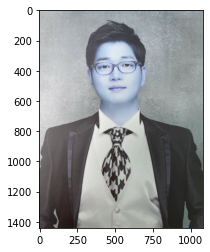

In [147]:
# 얼굴 이미지 읽기

img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)                    # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()                             # 이미지를 출력해준다. (실제 출력)

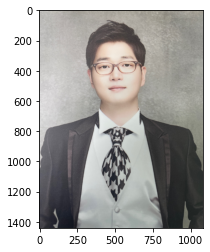

In [148]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

rectangles[[(348, 277) (669, 598)]]


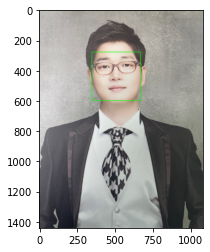

In [149]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 랜드마크 



68


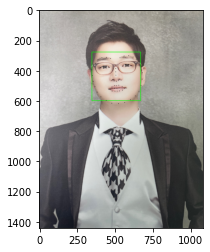

In [150]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

    # list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 0, 0), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## Step 3. 스티커 적용 위치 확인하기  



- 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산
- 33번 보다 좋은 위치

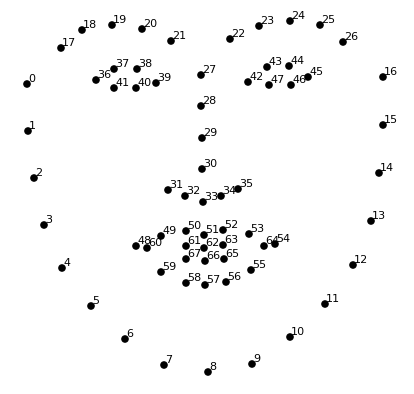



In [151]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30])                                   # 코의 index는 30 입니다
    x = landmark[30][0]                                    # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width() 
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(506, 430)
(x,y) : (506,269)
(w,h) : (322,322)


## Step 4. 스티커 적용하기



#### (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.


(322, 322, 3)


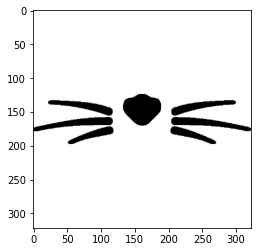

In [152]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/001-cat-whiskers.png' # 고양아 수염 이미지의 경로
# sticker_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/king.png' # 왕관 이미지의 경로

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(img_sticker) # 이미지 실제 출력하기 위해 이미지를 올려줌 
plt.show() # 이미지 실제 출력

In [153]:
refined_x = x - w // 2 
refined_y = y
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 스티커 이미지가 시작됨
print ('(refined_x, refined_y) : (%d,%d)'%(refined_x, refined_y)) # 음수 발생? nope!

(refined_x, refined_y) : (345,269)


In [154]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,269)


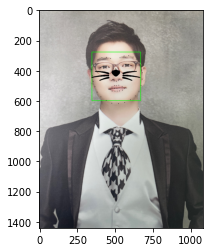

In [155]:

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 
# sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

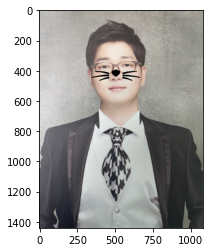

In [156]:
# 위에서 설명했으므로 생략
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

#### (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요?

 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.


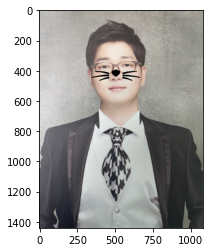

In [157]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## Step 5. 문제점 찾아보기


#### (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.


- 앞의 코드 모아 보기

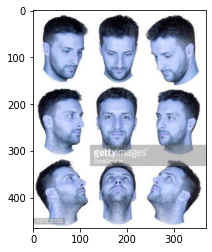

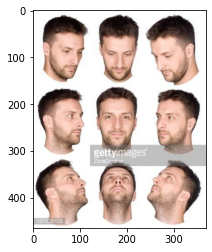

rectangles[[(46, 63) (121, 138)], [(135, 206) (225, 295)], [(235, 196) (325, 285)], [(146, 72) (220, 146)], [(245, 72) (320, 146)], [(149, 343) (211, 405)], [(46, 204) (121, 279)]]


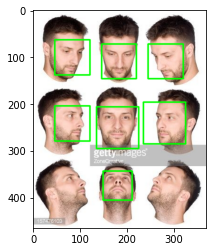

68


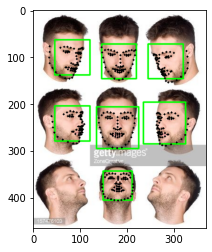

(94, 112)
(x,y) : (94,74)
(w,h) : (76,76)
(180, 249)
(x,y) : (180,204)
(w,h) : (91,91)
(266, 246)
(x,y) : (266,201)
(w,h) : (91,91)
(186, 120)
(x,y) : (186,83)
(w,h) : (75,75)
(267, 122)
(x,y) : (267,85)
(w,h) : (76,76)
(181, 362)
(x,y) : (181,331)
(w,h) : (63,63)
(109, 243)
(x,y) : (109,205)
(w,h) : (76,76)
(76, 76, 3)


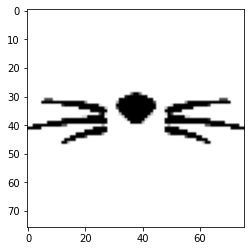

(refined_x, refined_y) : (71,205)
(x,y) : (71,205)


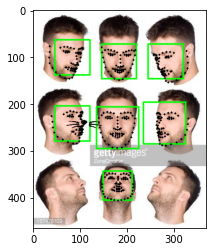

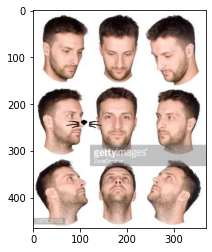

In [160]:
cat_whiskers_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/001-cat-whiskers.png'
my_image_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/diff_face_ang.jpg'

## Step 2. 얼굴 검출 & 랜드마크 검출 하기  

# 얼굴 이미지 읽기

img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)                    # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()                             # 이미지를 출력해준다. (실제 출력)
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

    # list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 0, 0), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력
## Step 3. 스티커 적용 위치 확인하기  


# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30])                                   # 코의 index는 30 입니다
    x = landmark[30][0]                                    # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width() 
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
## Step 4. 스티커 적용하기


#### (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

sticker_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/001-cat-whiskers.png' # 고양아 수염 이미지의 경로
# sticker_path = '/content/drive/MyDrive/Colab Notebooks/Exploration/camera_sticker/imgs/king.png' # 왕관 이미지의 경로

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(img_sticker) # 이미지 실제 출력하기 위해 이미지를 올려줌 
plt.show() # 이미지 실제 출력
refined_x = x - w // 2 
refined_y = y
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 스티커 이미지가 시작됨
print ('(refined_x, refined_y) : (%d,%d)'%(refined_x, refined_y)) # 음수 발생? nope!
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 
# sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
# 위에서 설명했으므로 생략
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

#### (2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요.  

| 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

| 생각해 보기  

- 얼굴 각도가 변할 때 스티커 이미지는 회전하고 모양이 변해야 한다.  
모양의 변화는 코를 중심으로 수염의 길이가 대칭에서 비대칭으로 한쪽이 길고 한쪽은 짧거나 없는 형태로 변해야 한다.
  
- 멀리서 촬영 시 픽셀에서 랜드마크의 구분이 불가능할 수도 있을 것 같다. 즉, 랜드마크간격이 픽셀보다 작으면 안된다.  
또한 누우면 랜드마크의 x축 값과 y 축 값이 달라져야 할텐데 라이브러리에서 그게 되는 지 궁금하다. 
  
- 실제 이모지나 스티커 적용 앱을 보면, 실시간으로 얼굴을 인식하고 그에 맞게 스티커 적용을 하는 것을 볼 수 있다. 그렇다면, 정확도와 이미지 퀄리티 보다는 속도가 중요할 수 있다.
  
- 위에서 말한 실시간 적용의 경우에는 정확도를 줄이더라도 속도를 높이는 것이 맞고, 고퀄의 유투브 영상이나 영화 드라마에서 적용할 경우에는 정확도가 더 중요해질 수 있을 것 같다.






| 이 외의 생각들  
- 얼굴 인식이 이렇게 간단한 라이브러리 적용으로 가능하다니.. 대단한 것 같습니다.
- 비록 간단하지만 제가 얼굴인식을 할 수 있다니... 대견하네요. ㅜㅜ